In [1]:
# @Khom
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, exp

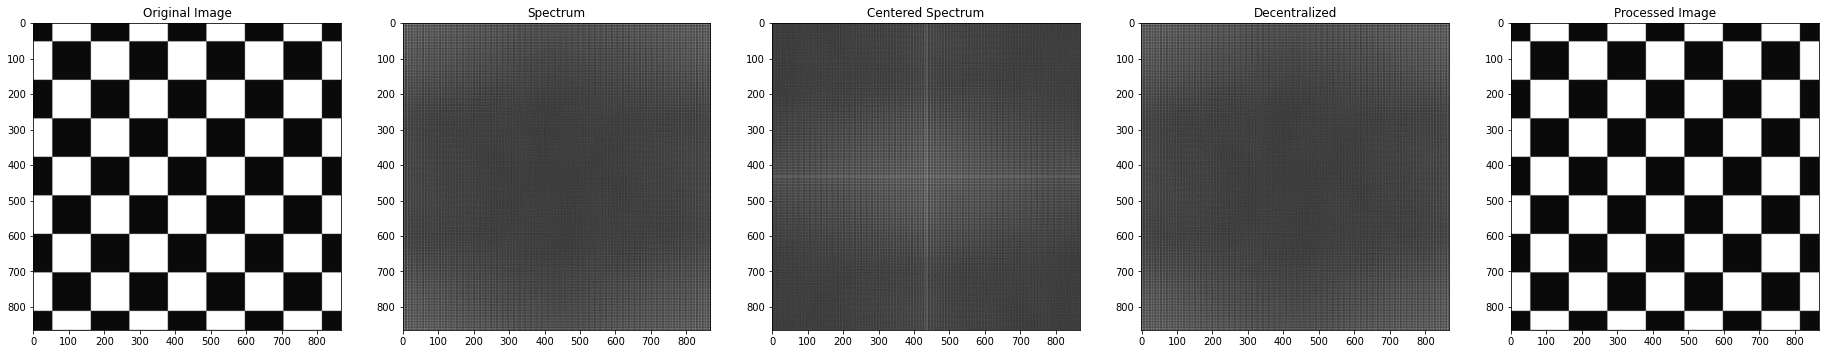

In [2]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

img = cv2.imread("bnw.png", 0)
# img = cv2.imread("chess.jpg", 0)
plt.subplot(151), plt.imshow(img, 'gray'), plt.title('Original Image')

original = np.fft.fft2(img)
plt.subplot(152), plt.imshow(np.log(1+np.abs(original)), 'gray'), plt.title('Spectrum')

center = np.fft.fftshift(original)
plt.subplot(153), plt.imshow(np.log(1+np.abs(center)), 'gray'), plt.title('Centered Spectrum')

inv_center = np.fft.ifftshift(center)
plt.subplot(154), plt.imshow(np.log(1+np.abs(inv_center)), 'gray'), plt.title('Decentralized')

processed_img = np.fft.ifft2(inv_center)
plt.subplot(155), plt.imshow(np.abs(processed_img), 'gray'), plt.title('Processed Image')

plt.show()

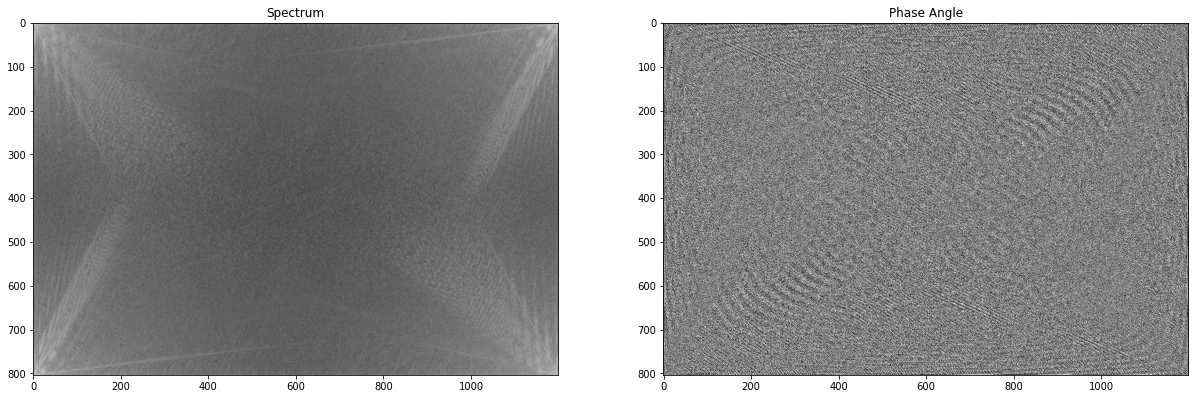

In [3]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

img = cv2.imread('chess.jpg', 0)

original =  np.fft.fft2(img)
plt.subplot(131), plt.imshow(np.log(np.abs(original)), 'gray'), plt.title('Spectrum')

plt.subplot(132), plt.imshow(np.angle(original), 'gray'), plt.title('Phase Angle')
plt.show()

In [5]:
def distance(point1, point2):
    return sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)


def idealFilterLP(D0, imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2, cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x), center) < D0:
                base[y,x] = 1
    return base


def idealFilterHP(D0, imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2, cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x), center) < D0:
                base[y,x] = 0
    return base

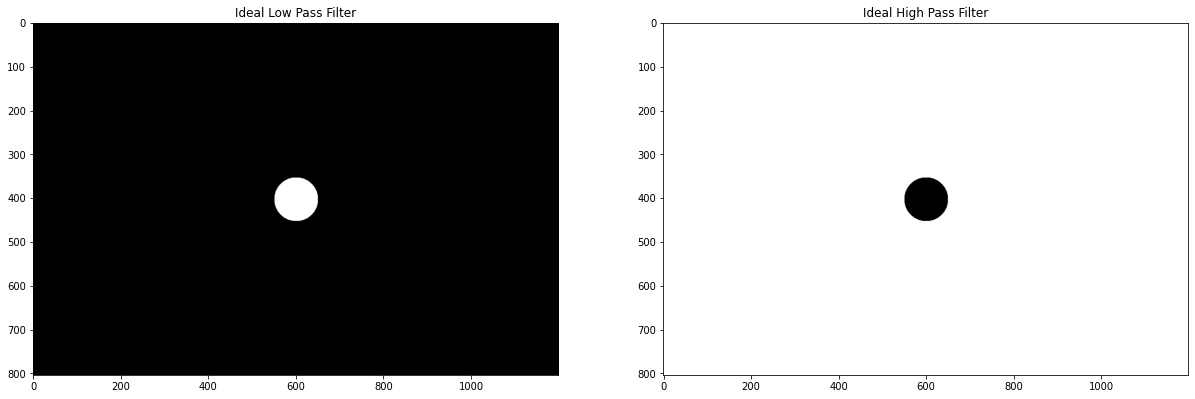

In [6]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

LowPass = idealFilterLP(50, img.shape)
plt.subplot(131), plt.imshow(LowPass, 'gray'), plt.title('Ideal Low Pass Filter')

HighPass = idealFilterHP(50, img.shape)
plt.subplot(132), plt.imshow(HighPass, 'gray'), plt.title('Ideal High Pass Filter')

plt.show()